<a href="https://colab.research.google.com/github/nhutd107/CNN_BT_AI/blob/main/NhanDienTien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [2]:
folder = '/content/drive/MyDrive/Tien/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('000000'):
     output= 1.0
  if file.startswith('000200'):
    output= 2.0
  if file.startswith('000500'):
    output= 3.0
  if file.startswith('001000'):
    output= 4.0
  if file.startswith('002000'):
    output= 5.0
  if file.startswith('005000'):
    output= 6.0
  if file.startswith('010000'):
    output= 7.0
  if file.startswith('020000'):
    output= 8.0
  if file.startswith('050000'):
    output= 9.0
  if file.startswith('100000'):
    output= 10.0
  if file.startswith('200000'):
    output= 11.0
  if file.startswith('500000'):
    output= 12.0
  photo = load_img(folder + file, target_size= (96,72))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [3]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/Data_Tien/tien_photos.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/Data_Tien/tien_labels.npy', labels)

(2711, 96, 72, 3) (2711,)


In [4]:
# Split data into train & test
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [5]:
print(test_x.shape, train_x.shape)

(135, 96, 72, 3) (2576, 96, 72, 3)


In [6]:
train_x = train_x.reshape((2576, 96, 72, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((135, 96, 72, 3))
test_x = test_x.astype('float32')/255

In [7]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,13)
test_y = to_categorical(test_y,13)

In [8]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 50
classes = 13

In [9]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (96, 72, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [10]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 72, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 72, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 36, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 36, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 36, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 48, 36, 64)        0         
                                                        

In [11]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/50
41/41 [==============================] - 18s 69ms/step - loss: 2.6506 - accuracy: 0.1040
Epoch 2/50
41/41 [==============================] - 2s 43ms/step - loss: 2.4806 - accuracy: 0.1056
Epoch 3/50
41/41 [==============================] - 2s 39ms/step - loss: 2.4674 - accuracy: 0.0986
Epoch 4/50
41/41 [==============================] - 2s 38ms/step - loss: 2.3946 - accuracy: 0.1720
Epoch 5/50
41/41 [==============================] - 2s 38ms/step - loss: 1.9962 - accuracy: 0.3012
Epoch 6/50
41/41 [==============================] - 2s 38ms/step - loss: 1.6573 - accuracy: 0.3960
Epoch 7/50
41/41 [==============================] - 2s 38ms/step - loss: 1.3797 - accuracy: 0.4977
Epoch 8/50
41/41 [==============================] - 2s 39ms/step - loss: 1.2127 - accuracy: 0.5629
Epoch 9/50
41/41 [==============================] - 2s 39ms/step - loss: 1.0123 - accuracy: 0.6417
Epoch 10/50
41/41 [==============================] - 2s 38ms/step - loss: 0.7007 - accuracy: 0.7469
Epoch 11

In [12]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

5/5 [==============================] - 1s 74ms/step - loss: 0.9746 - accuracy: 0.8519
Test accuracy: 0.8518518805503845


In [14]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data_Tienmodel_tien.h5')

1/1 [==============================] - 0s 19ms/step
5
002000


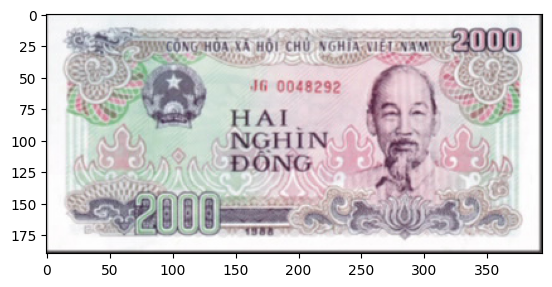

1/1 [==============================] - 0s 19ms/step
12
500000


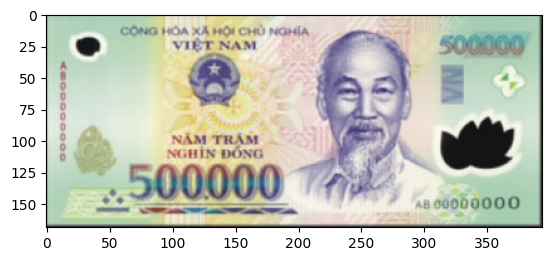

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/Test_Tien/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (96, 72))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  print(result)
  class_name=['', '000000', '000200', '000500', '001000', '002000', '005000', '010000', '020000', '050000', '100000', '200000', '500000']
  print(class_name[result])
  plt.show()